# Object Detection-2

## Feature Matching

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [8]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)     

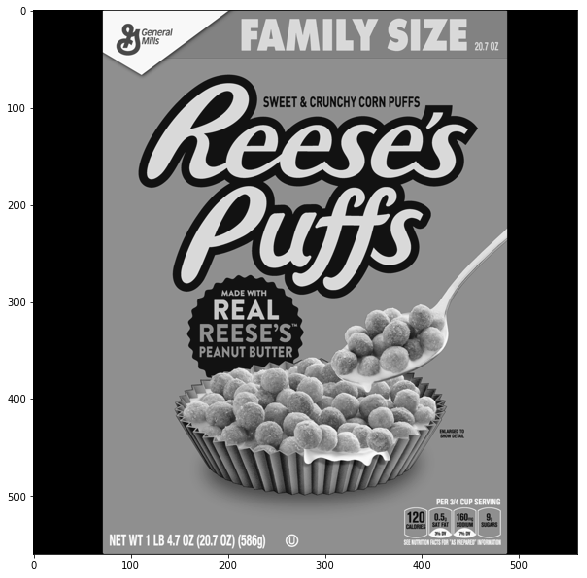

In [9]:
display(reeses)

In [10]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0) 

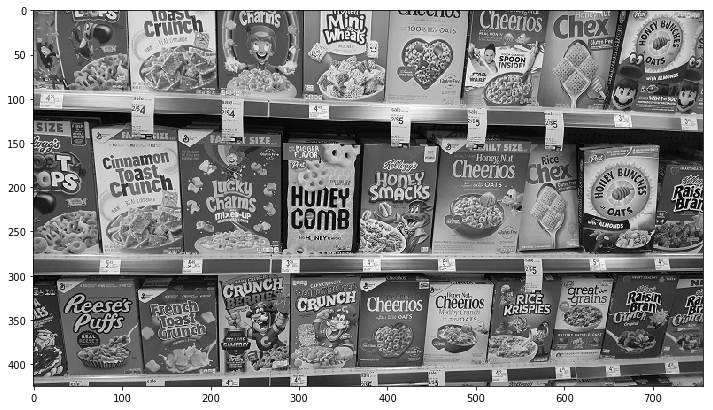

In [11]:
display(cereals)

--------
# Brute Force Detection with ORB Descriptors

ORB - Oriented Fast and Rotated Brief ... it is a combination of the FAST keypoint detector and the Brief descriptor.. and it is a binary descriptor

In [12]:
# Initiate ORB detector - Oriened faster and rotated brief
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)
print('it has found',len(matches),'matches')

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches,None,flags=2)

it has found 263 matches


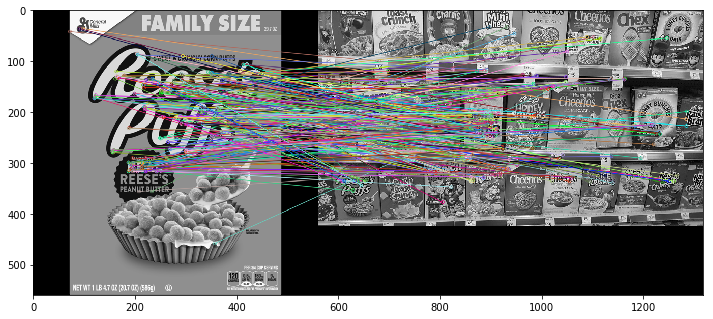

In [13]:
display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

SIFT -Scale  Invariant Feature Transform 
It also finds the keypoints and descriptors but using the features

Steps followed 
1. Feature point detection
2. Feature point localization
3. Orient assignment
4. Feature descriptor generation

Generally speaking it is scale invariant i.e., even if u change one of the following of the images the result is invariant
they are scale, rotation, illumination and viewpoint

You can see the results now

In [14]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

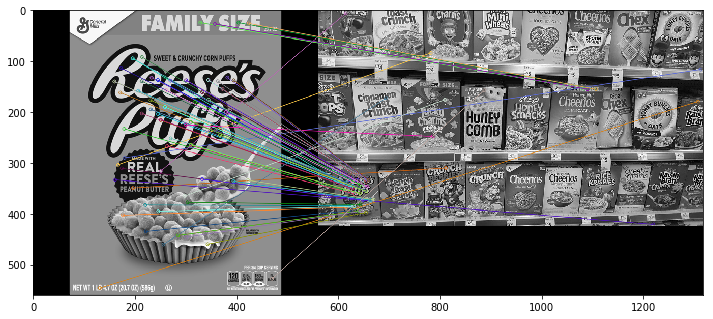

In [15]:
display(sift_matches)

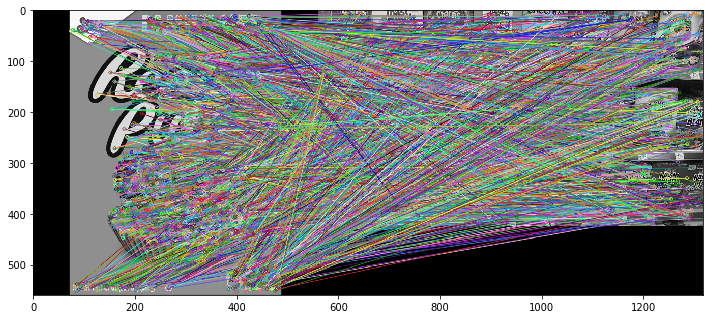

In [16]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,flags=2)
display(sift_matches)

# FLANN based Matcher

FLANN - Fast Approximate Nearest Neighbor search using feature descriptors that are based on  the euclidean distance (SIFT, SURF(speeded up robust features),..)
but ORB are hamming distance descriptor 
hamming distance - equivalent to count the number of diff elements for binary strings

Based on the descriptors FLANN performs quick and efficient matching by clustering

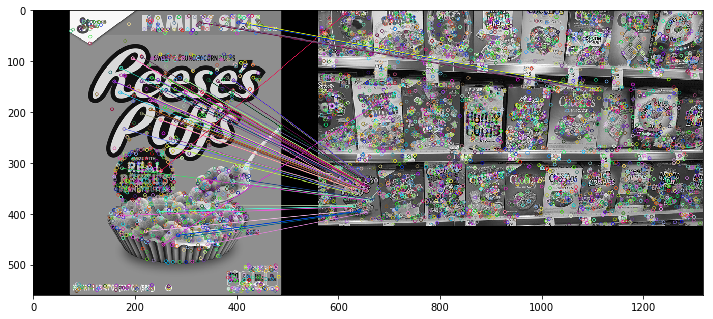

In [17]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

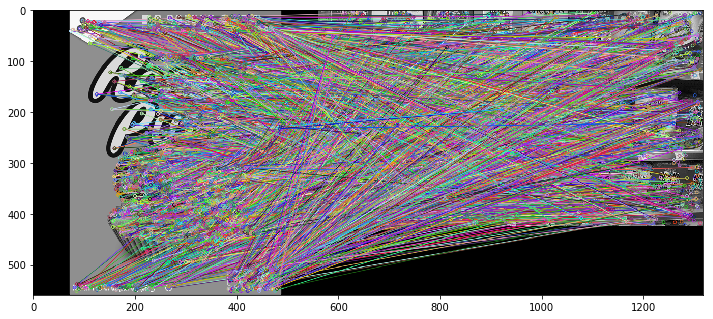

In [18]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,flags=0)

display(flann_matches)

In [19]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

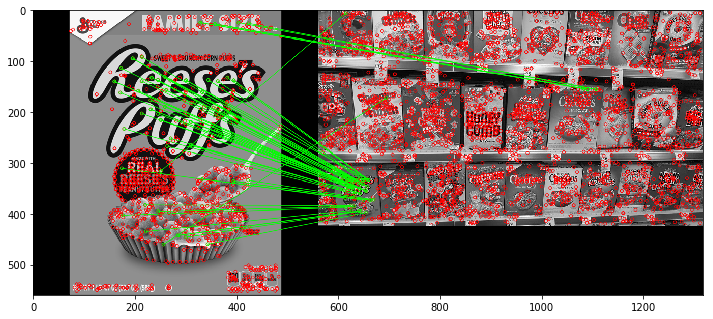

In [20]:
display(flann_matches)

## Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [21]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

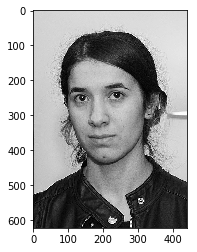

In [22]:
plt.imshow(nadia,cmap='gray')

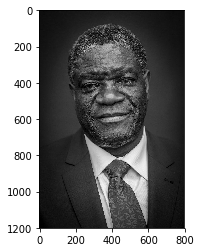

In [23]:
plt.imshow(denis,cmap='gray')

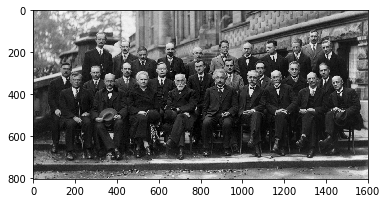

In [24]:
plt.imshow(solvay,cmap='gray')

In [25]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [26]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [27]:
result = detect_face(denis)

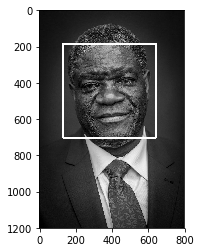

In [28]:
plt.imshow(result,cmap='gray')

## Detect the faces in a group image

In [29]:
result = detect_face(solvay)

In [30]:
plt.imshow(result,cmap='gray')

## Eye Detection

In [31]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [32]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

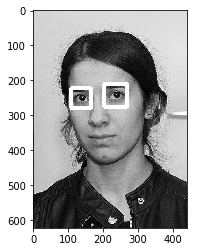

In [33]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

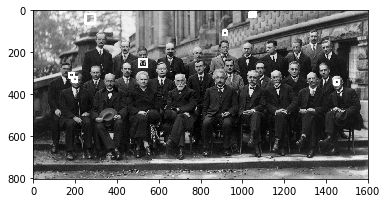

In [34]:
result = detect_eyes(solvay)
plt.imshow(result,cmap='gray')

## Bad Results right?

## Face Detection in Live video

In [36]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()